In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Customer Info

In [2]:
customer_info_df = pd.read_excel('./data/dataset/CUSTOMER INFO_PJDSC.xlsx')
customer_info_df.head()

,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,IDV_OR_ORG,SEGMENT,SUBSEGMENT,GENDER,MARITAL_STATUS
0,11712.654012,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.833333,N,DIGITAL,ALLOWANCE,1,3,CORE MASS,MALE,SINGLE
1,436.605085,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,21.0,4.250000,N,NO_DATA,SALARY,1,3,CORE MASS,FEMALE,SINGLE
2,921.989154,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,23.0,2.000000,N,TRADITIONAL,ALLOWANCE,1,3,CORE MASS,MALE,SINGLE
3,1119.634762,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),LOW,13.0,5.583333,N,TRADITIONAL,ALLOWANCE,1,3,CORE MASS,MALE,SINGLE
4,1709.755538,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.250000,N,DIGITAL,SALARY,1,3,CORE MASS,FEMALE,SINGLE


In [10]:
customer_info_df.columns = [feat.lower() for feat in customer_info_df.columns]

In [12]:
customer_info_df.nunique()

cust_num          46148
province             45
region               14
education             4
age                 106
tenure              307
business_owner        2
digital_flag          3
income_source        12
gender                3
marital_status        6
dtype: int64

In [4]:
customer_info_df.drop(labels=['IDV_OR_ORG', 'SEGMENT', 'SUBSEGMENT'], axis=1, inplace=True)

In [13]:
customer_info_df.shape

(138444, 11)

It is worth-noting that the `CUST_NUM` feature is not unique to all 138444 customers.

In [14]:
customer_info_df.isna().sum()

cust_num           0
province           0
region             0
education          0
age               66
tenure             0
business_owner     0
digital_flag       0
income_source      0
gender             0
marital_status     0
dtype: int64

In [19]:
for feats in customer_info_df.columns:
    print(f'{feats}: {customer_info_df[feats].dtype}')

cust_num: float64
province: object
region: object
education: object
age: float64
tenure: float64
business_owner: object
digital_flag: object
income_source: object
gender: object
marital_status: object


## Categorical Feature Encoding

In [29]:
business_owner_mapping = {'Y': 1, 'N': 0}
customer_info_df.business_owner = customer_info_df.business_owner.map(business_owner_mapping)

## Preliminary Analysis

### Province

In [64]:
customer_info_df['province'].value_counts()

province
NEGROS OCCIDENTAL                 13488
MISAMIS ORIENTAL                   9783
PANGASINAN                         8841
BENGUET                            8214
ZAMBALES                           5742
ZAMBOANGA DEL SUR                  5310
SOUTH COTABATO                     5262
NEGROS ORIENTAL                    5034
LEYTE                              4845
NUEVA ECIJA                        4836
BOHOL                              4206
CAMARINES SUR                      4044
TARLAC                             4020
ISABELA                            3792
ALBAY                              3546
LA UNION                           3462
DAVAO DEL NORTE                    3432
ILOCOS NORTE                       3363
CAGAYAN                            3111
AKLAN                              3102
BATAAN                             2727
CAPIZ                              2634
LANAO DEL NORTE                    2460
PALAWAN                            2397
AGUSAN DEL NORTE               

### Region

In [63]:
customer_info_df['region'].value_counts()

region
REGION VI (WESTERN VISAYAS)               20508
REGION I (ILOCOS REGION)                  17559
REGION III (CENTRAL LUZON)                17325
REGION X (NORTHERN MINDANAO)              16059
REGION V (BICOL REGION)                    9633
REGION VII (CENTRAL VISAYAS)               9240
CORDILLERA ADMINISTRATIVE REGION (CAR)     8214
REGION II (CAGAYAN VALLEY)                 8022
REGION XII (SOCCSKSARGEN)                  7932
REGION IX (ZAMBOANGA PENINSULA)            6630
REGION VIII (EASTERN VISAYAS)              5844
REGION XIII (CARAGA)                       4143
REGION XI (DAVAO REGION)                   3885
MIMAROPA REGION                            3450
Name: count, dtype: int64

In [62]:
customer_info_df['education'].value_counts()

education
MID        63396
NO_DATA    39690
LOW        32748
HIGH        2610
Name: count, dtype: int64

As we can see from the count, we might need to impute the missing values for the `education` feature.

### Age

In [65]:
customer_info_df['age'].value_counts()

age
27.0     5499
28.0     5481
26.0     5391
29.0     5310
30.0     5088
         ... 
1.0         3
104.0       3
4.0         3
108.0       3
3.0         3
Name: count, Length: 106, dtype: int64

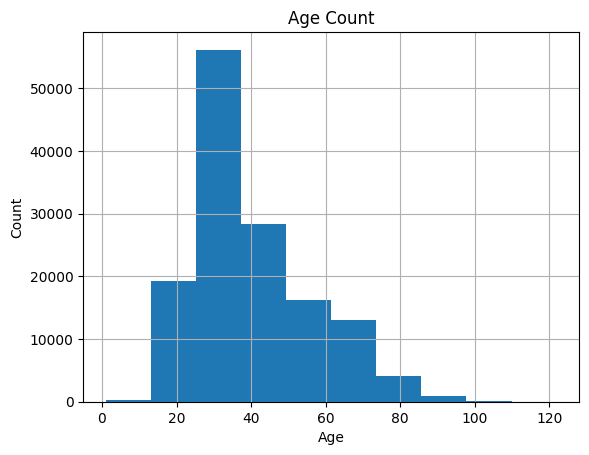

In [42]:
customer_info_df['age'].hist()
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [66]:
customer_info_df['tenure'].value_counts()

tenure
0.916667     1833
0.333333     1797
0.833333     1785
0.750000     1773
0.666667     1755
             ... 
27.000000       3
25.833333       3
26.583333       3
26.916667       3
23.083333       3
Name: count, Length: 307, dtype: int64

### Business Owner

In [68]:
customer_info_df['business_owner'].value_counts()

business_owner
0    131553
1      6891
Name: count, dtype: int64

### Digital Flag

In [69]:
customer_info_df['digital_flag'].value_counts()

digital_flag
TRADITIONAL    64695
NO_DATA        41775
DIGITAL        31974
Name: count, dtype: int64

### Income Source

In [72]:
customer_info_df['income_source'].value_counts()

income_source
SALARY                                     84531
ALLOWANCE                                  18357
PENSION                                    11055
REMITTANCE                                 10581
BUSINESS                                    7818
OTHER_SOURCES_NOT_SPECIFIED                 2181
NO_DATA                                     1830
COMMISSION                                  1533
ECONOMICALLY_INACTIVE                        300
INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS      234
DONATION                                      21
CAMPAIGN_FUND                                  3
Name: count, dtype: int64

### Gender

In [70]:
customer_info_df['gender'].value_counts()

gender
FEMALE    80298
MALE      55380
OTHERS     2766
Name: count, dtype: int64

Note: Di ko nagagawang graph. Basta mas maraming babae ang gumagamit.

### Marital Status

In [73]:
customer_info_df['marital_status'].value_counts()

marital_status
SINGLE       80310
MARRIED      48459
WIDOWED       4149
DIVORCED      2769
SEPARATED     1395
OTHERS        1362
Name: count, dtype: int64

Add correlation matrix dito.

In [67]:
customer_info_df.corr()

ValueError: could not convert string to float: 'BENGUET'

Need nga imap lahat ng categorical variables para macorrelate.